In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/seungwooseo/Desktop/Python/Kaggle/KNN algorithm dataset/KNNAlgorithmDataset.csv')

In [5]:
df = df.drop(columns='Unnamed: 32')

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()

In [10]:
sc.fit(df.drop(columns='diagnosis'))

StandardScaler()

In [11]:
df_scaled=sc.transform(df.drop(columns='diagnosis'))

In [14]:
df_scaled = pd.DataFrame(df_scaled, columns=df.drop(columns='diagnosis').columns)

In [17]:
df_scaled = df_scaled.drop(columns='id')

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [25]:
X = df_scaled
y = df['diagnosis']

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

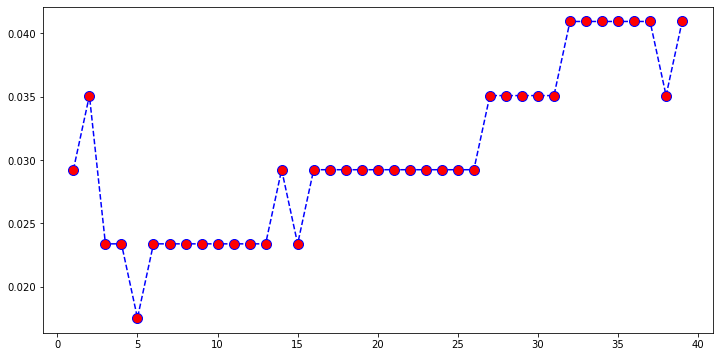

In [31]:
plt.figure(figsize=(12,6))
error_rate = []
for i in range(1,40):
    knc = KNeighborsClassifier(n_neighbors = i)
    knc.fit(x_train,y_train)
    pred_i = knc.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1,40),error_rate,linestyle='dashed',marker='o',color='blue',markersize=10,markerfacecolor='red')
plt.show()

In [33]:
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train,y_train)
predictions = knc.predict(x_test)
print(accuracy_score(y_test,predictions))

0.9824561403508771


In [34]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[97  0]
 [ 3 71]]
              precision    recall  f1-score   support

           B       0.97      1.00      0.98        97
           M       1.00      0.96      0.98        74

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

